## Results of the cornmat’ PCR models

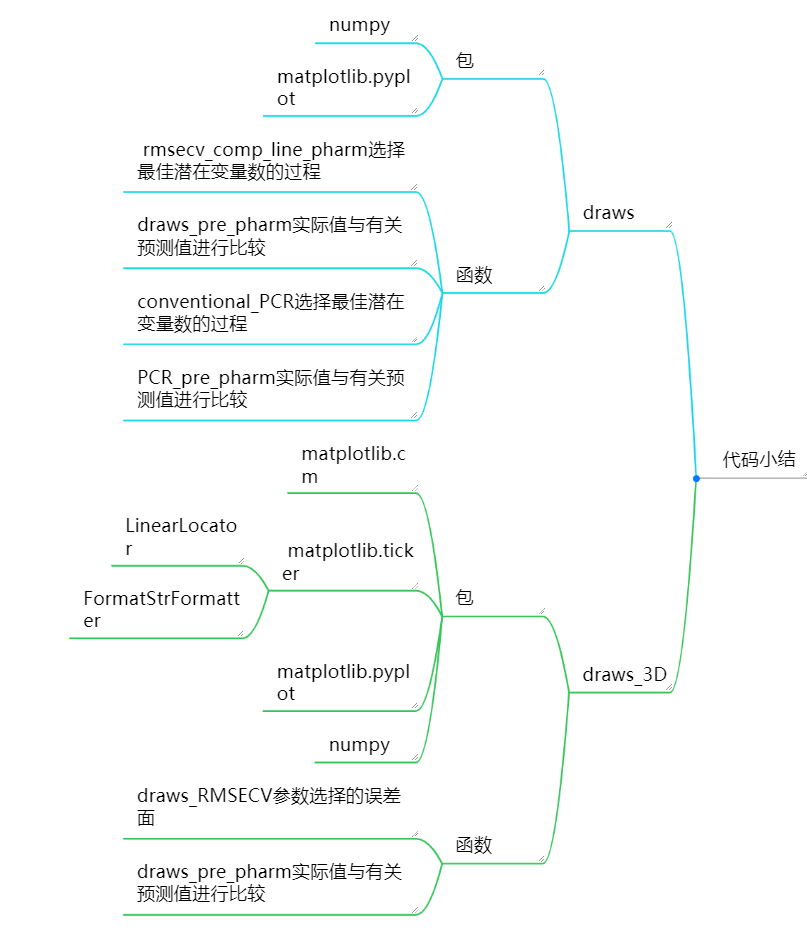

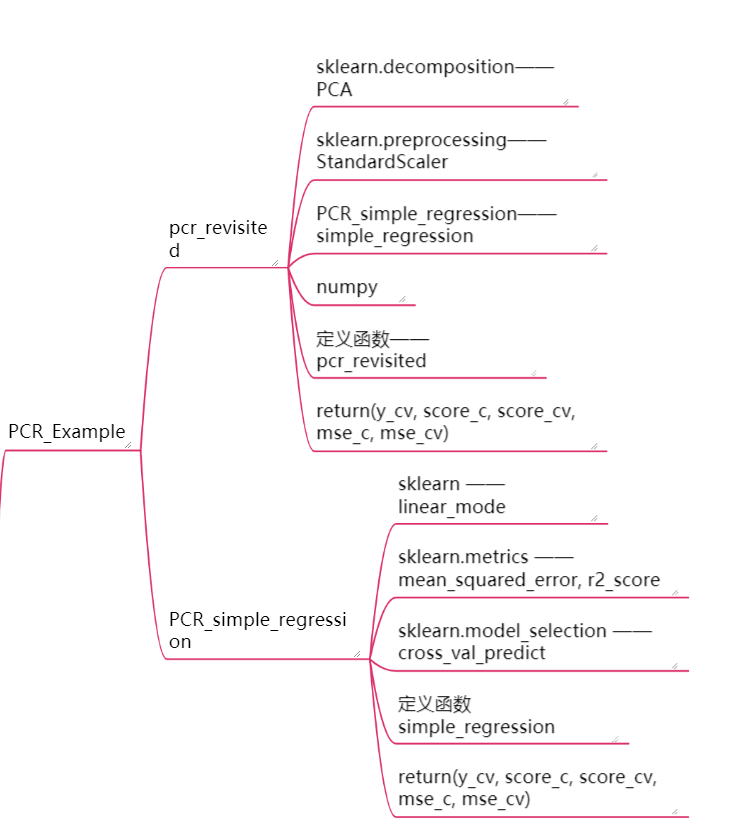

PCR是一个两步过程：

* 对数据运行PCA，以将自变量分解为“主要成分”，对应于删除相关成分
* 选择主成分的一个子集，然后对校准值进行回归

In [1]:
import pandas as pd
import numpy as np
from scipy.io.matlab.mio import loadmat
from pcr_revisited import pcr_revisited
from PCR_simple_regression import simple_regression
import draws

The principal component number selection process of PCR model about the  m5  instrument


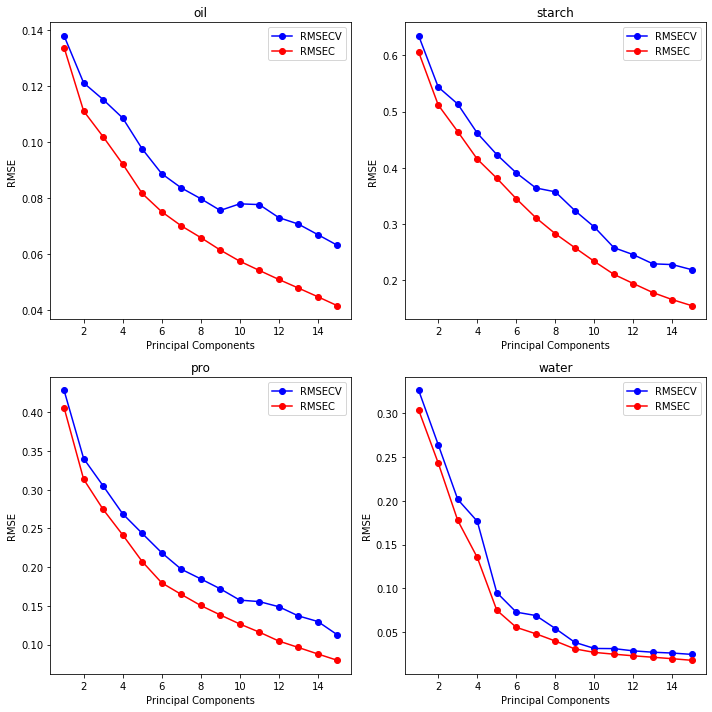

Measured values versus predicted values of the  m5 instrument as determined by PCR


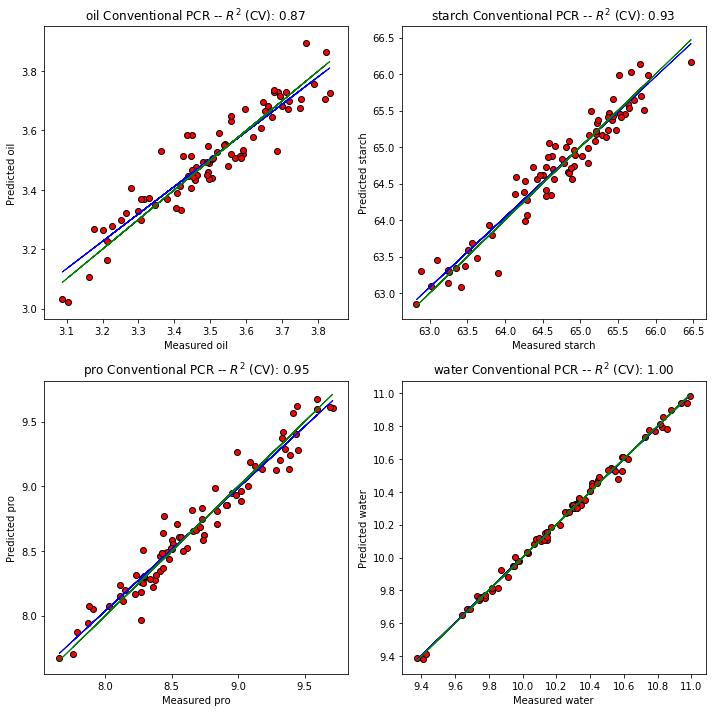

The principal component number selection process of PCR model about the  mp5  instrument


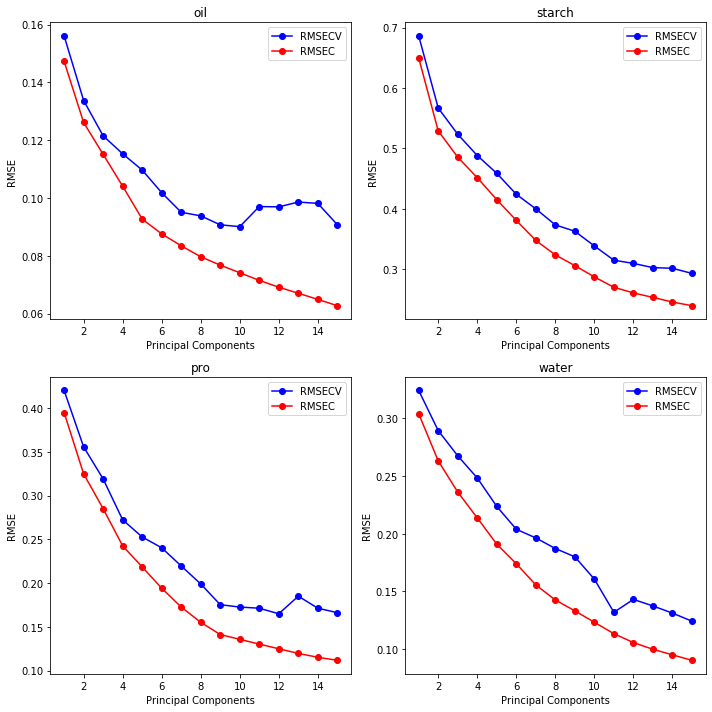

Measured values versus predicted values of the  mp5 instrument as determined by PCR


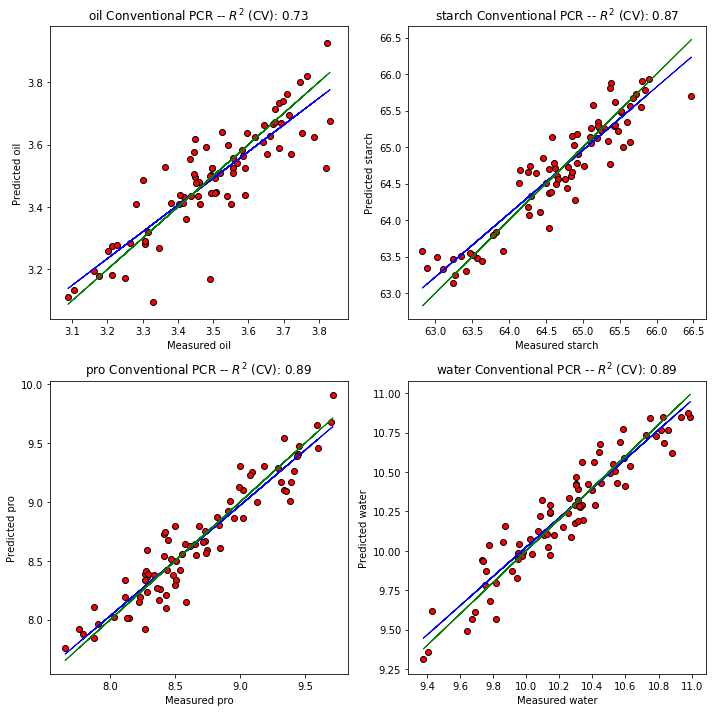

The principal component number selection process of PCR model about the  mp6  instrument


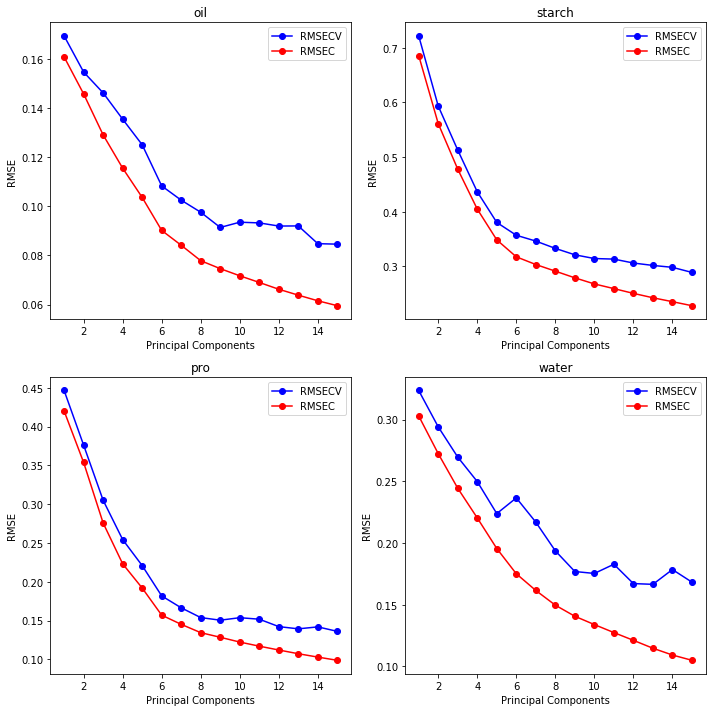

Measured values versus predicted values of the  mp6 instrument as determined by PCR


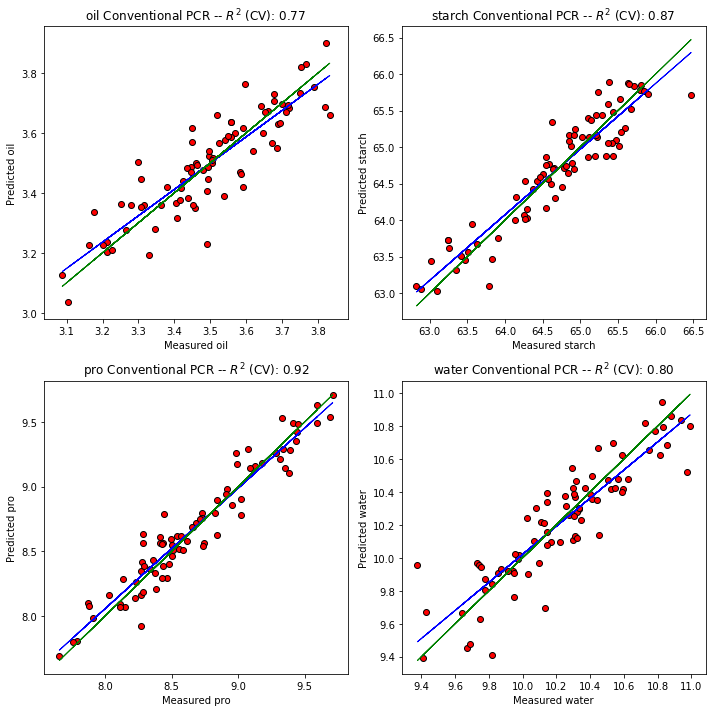

In [2]:
if __name__ == '__main__':
    # Read data
    fname = loadmat(r'E:\Documents\DAY\cornmat.mat')
    X = ('m5', 'mp5','mp6')
    Y = ('oil', 'starch', 'pro', 'water')
    npc = 15 # maximum number of principal components
    for a in X: #对每个instrument
        msec_list = []        
        msecv_list = []
        
        y_list = []
        z_list = []
        predicted_list = []
        r2cv_list = []

        for b in Y:    
            X = fname[a]
            #print (X.shape)
            y = np.squeeze(fname[b])#数组降维
            #print (y.shape)
            pc = range(1,npc+1,1)

            # Define arrays for R^2 and MSE
            r2c = np.zeros(npc)
            r2cv = np.zeros(npc)
            msec = np.zeros(npc)
            msecv = np.zeros(npc)

            for i in pc:
                predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr_revisited(X,y, pc=i)
            msec_list.append(msec)        
            msecv_list.append(msecv)
            
            predicted, r2r, r2cv, Mser, Mscv = pcr_revisited(X,y, pc=15)
            z = np.polyfit(y, predicted, 1)
            y_list.append(y)
            z_list.append(z)
            predicted_list.append(predicted)
            r2cv_list.append(r2cv)
        
        print ("The principal component number selection process of PCR model about the ",a," instrument")
        draws.conventional_PCR(Y,pc,msecv_list,msec_list)
        print ("Measured values versus predicted values of the ",a,"instrument as determined by PCR")
        draws.PCR_pre_pharm(Y,y_list,z_list,predicted_list,r2cv_list)
        